<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep_learning_school_baseflow/07. Композиция алгоритмов и выбор модели/train.csv')

In [6]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [7]:
# выведем 5 рандомных строк
data.sample(n=5, random_state=31)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3692,3,80.70,239.45,Female,0,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,0
3349,55,45.05,2462.6,Female,0,No,No,Yes,No,DSL,No,No,No,No,No,No,One year,No,Bank transfer (automatic),0
439,51,60.15,3077,Female,0,No,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),0
3785,51,77.50,3807.35,Female,1,Yes,No,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
4137,48,117.45,5438.9,Female,1,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,1


In [8]:
# поссчитаем количество nan в каждой строке
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [9]:
data['TotalSpent'].dtypes

dtype('O')

In [10]:
# заменим пустые строки на нули и приведем к типу float
data['TotalSpent'] = data['TotalSpent'].replace(' ', '0')
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

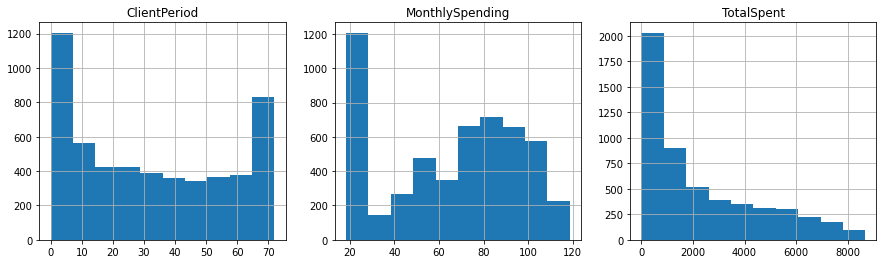

In [11]:
# построим гистограммы для численных признаков
plt.figure(figsize=(15, 4))
for indx,val in enumerate(num_cols):
  plt.subplot(1, 3, indx+1)
  plt.hist(data[val])
  plt.title(val)
  plt.grid(True)
plt.show()

In [ ]:
# выведем количество каждого значения для каждого признака
for i in cat_cols:
  print(data[i].value_counts(), '\n')

Male      2655
Female    2627
Name: Sex, dtype: int64 

0    4440
1     842
Name: IsSeniorCitizen, dtype: int64 

No     2705
Yes    2577
Name: HasPartner, dtype: int64 

No     3676
Yes    1606
Name: HasChild, dtype: int64 

Yes    4761
No      521
Name: HasPhoneService, dtype: int64 

No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64 

Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64 

No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64 

No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64 

No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64 

No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess,

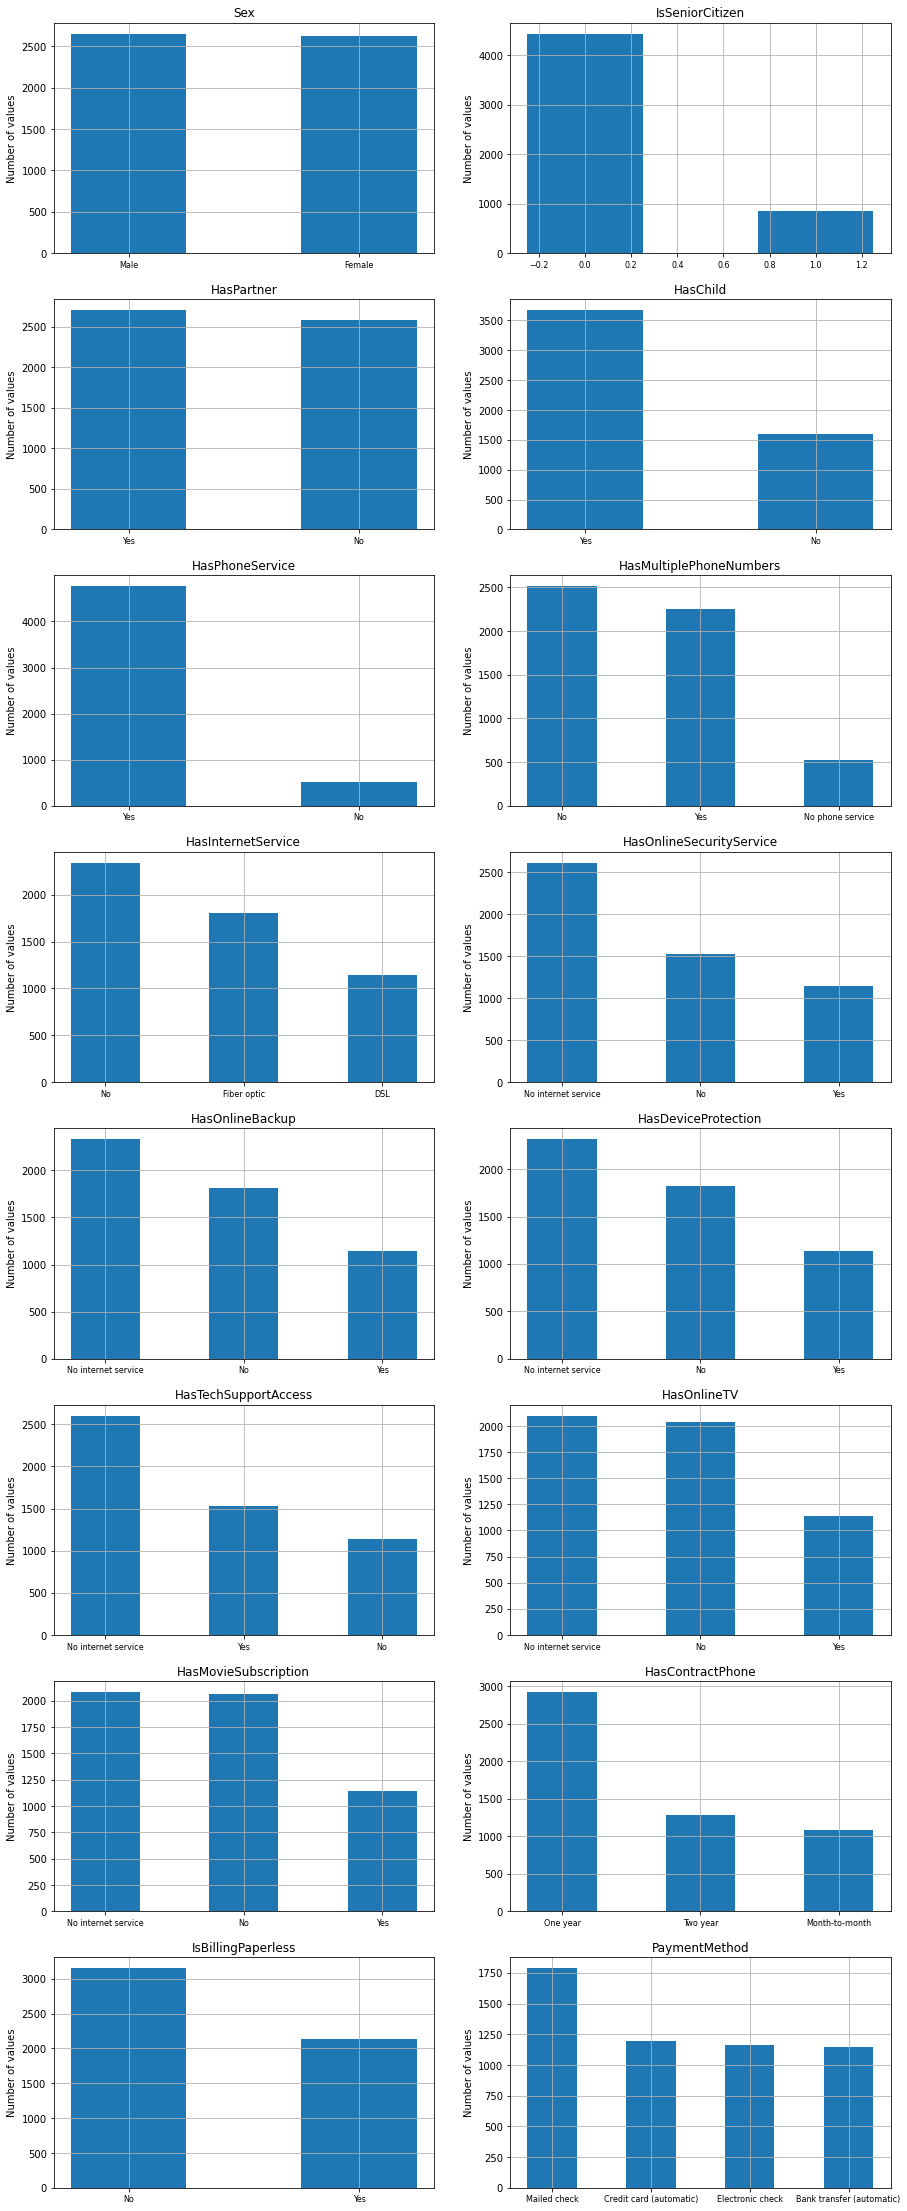

In [ ]:
# построим диаграммы для категориальных признаков
plt.figure(figsize=(15, 50))
for indx,val in enumerate(cat_cols):
  plt.subplot(10, 2, indx+1)
  plt.bar(data[val].unique(), data[val].value_counts(), width=0.5)
  plt.title(val)
  plt.tick_params(axis='x', labelsize=8)
  plt.ylabel('Number of values')
  plt.grid(True)
plt.show()

0    3898
1    1384
Name: Churn, dtype: int64


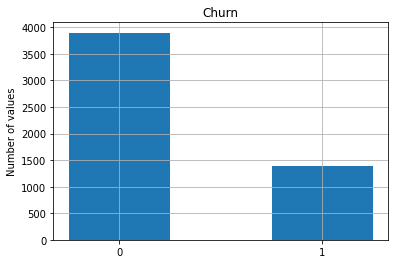

In [ ]:
# построим диаграмму для целевой переменной и выведем количество значений для каждого класса
print(data[target_col].value_counts())
plt.bar(['0','1'], data[target_col].value_counts(), width=0.5)
plt.title(target_col)
plt.ylabel('Number of values')
plt.grid(True)
plt.show()

Объектов первого класса примерно в 3 раза меньше, чем объектов нулевого класса. Это значит, что датасет несбалансирован не сильно.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [12]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

In [13]:
# выделим из датасета категориальные и числовые признаки
categorial_data = data[cat_cols]
numeric_data = data[num_cols]

In [14]:
categorial_data.head()

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [15]:
numeric_data.head()

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.20
2,1,75.90,75.90
3,32,79.30,2570.00
4,60,115.25,6758.45


In [16]:
# выполним One-hot кодирование и объединим признаки
dummy_features = pd.get_dummies(categorial_data)
X = pd.concat([numeric_data, dummy_features], axis=1)
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


In [17]:
# cоздадим переменную для выходных данных
y = data['Churn']

In [18]:
# посмотрим размерности входных и выходных данных
X.shape, y.shape

((5282, 45), (5282,))

In [19]:
# разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    test_size=0.2,
                                                    random_state=31)

In [20]:
# отнормируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# создадим объект LogisticRegressionCV
cv_model = LogisticRegressionCV(Cs=10, scoring='roc_auc', cv=5, refit=True, n_jobs=-1, verbose=10)

# запустим поиск
cv_model.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    4.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.9s finished


LogisticRegressionCV(cv=5, n_jobs=-1, scoring='roc_auc', verbose=10)

In [23]:
# получим предсказания модели
y_pred = cv_model.predict_proba(X_test_scaled)[:, 1]

In [24]:
# протестируем по метрике ROC-AUC 
roc_auc_score(y_test, y_pred)

0.8469640558926274

In [27]:
print(*cv_model.C_)

21.54434690031882


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество: 0.8469640558926274  
Лучший параметр: 21.54434690031882

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [29]:
!pip install catboost
import catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 109 kB/s 


In [30]:
# выделим из датасета входные данные
X_origin = data.iloc[:, :-1]
X_origin.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [31]:
# разделим выборку на обучающую и тестовую
X_train_origin, X_test_origin, _, _ = train_test_split(X_origin.values, y.values, 
                                                       test_size=0.2, 
                                                       random_state=31)

In [32]:
# создадим объект CatBoostClassifier
boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                             cat_features=np.arange(3,19))
# проведем обучение
boosting_model.fit(X_train_origin, y_train)

Learning rate set to 0.083391
0:	learn: 0.6383611	total: 63.7ms	remaining: 12.7s
1:	learn: 0.5998952	total: 76ms	remaining: 7.53s
2:	learn: 0.5641896	total: 91.6ms	remaining: 6.01s
3:	learn: 0.5371218	total: 107ms	remaining: 5.24s
4:	learn: 0.5157359	total: 120ms	remaining: 4.7s
5:	learn: 0.4978849	total: 136ms	remaining: 4.38s
6:	learn: 0.4835685	total: 147ms	remaining: 4.05s
7:	learn: 0.4720525	total: 182ms	remaining: 4.36s
8:	learn: 0.4612914	total: 218ms	remaining: 4.63s
9:	learn: 0.4522324	total: 241ms	remaining: 4.59s
10:	learn: 0.4442222	total: 256ms	remaining: 4.39s
11:	learn: 0.4384644	total: 269ms	remaining: 4.21s
12:	learn: 0.4346202	total: 278ms	remaining: 3.99s
13:	learn: 0.4312355	total: 289ms	remaining: 3.84s
14:	learn: 0.4275127	total: 303ms	remaining: 3.74s
15:	learn: 0.4231569	total: 318ms	remaining: 3.65s
16:	learn: 0.4193703	total: 336ms	remaining: 3.62s
17:	learn: 0.4166417	total: 348ms	remaining: 3.52s
18:	learn: 0.4144820	total: 361ms	remaining: 3.44s
19:	learn: 

In [33]:
# получим предсказания модели
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

In [34]:
# протестируем по метрике ROC-AUC 
roc_auc_score(y_test, y_test_predicted)

0.8492163081448797

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество: 0.8492163081448797

# Предсказания

In [ ]:
best_model = boosting_model

In [ ]:
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep_learning_school_baseflow/07. Композиция алгоритмов и выбор модели/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep_learning_school_baseflow/07. Композиция алгоритмов и выбор модели/submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/Deep_learning_school_baseflow/07. Композиция алгоритмов и выбор модели/my_submission.csv', index=False)

In [ ]:
my_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep_learning_school_baseflow/07. Композиция алгоритмов и выбор модели/my_submission.csv')
my_submission.head(10)

,Id,Churn
0,0,0.039965
1,1,0.664348
2,2,0.656526
3,3,0.013084
4,4,0.001505
5,5,0.089695
6,6,0.402614
7,7,0.247797
8,8,0.038800
9,9,0.363749


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.